In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from invert import Solver
import mne
import pickle
import numpy as np
from matplotlib import pyplot as plt

with open( 'D:/jupyter_note/SWX_source/Simulated_data/sim1.pkl', 'rb') as file:
    sim_test = pickle.load(file)

fwd = mne.read_forward_solution('fwd.fif')
# 这里一定要加一个condition=0，不然会变为list类型，会报错

# 指定画图参数
plot_params = dict(surface='white', initial_time=0.05, views=('lateral'), hemi='both', colorbar=None, background='white', verbose=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading forward solution from D:\jupyter_note\SWX_source\Simulated_data\fwd.fif...
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
    Desired named matrix (kind = 3523) not available
    Read EEG forward solution (1284 sources, 60 channels, free orientations)
    Source spaces transformed to the forward solution coordinate frame


<ipython-input-51-33728f495059>:13: RuntimeWarning: This filename (fwd.fif) does not conform to MNE naming conventions. All forward files should end with -fwd.fif, -fwd.fif.gz, _fwd.fif, _fwd.fif.gz, -fwd.h5 or _fwd.h5
  fwd = mne.read_forward_solution('fwd.fif')


<EpochsArray |  1 events (all good), 0 – 0.0976562 s, baseline off, ~101 kB, data loaded,
 '1': 1>
<Evoked | '1' (average, N=1), 0 – 0.097656 s, baseline off, 60 ch, ~101 kB>


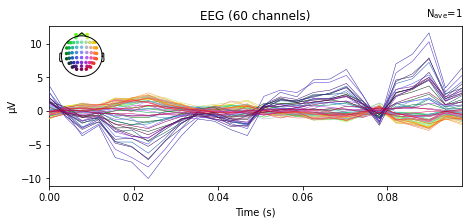

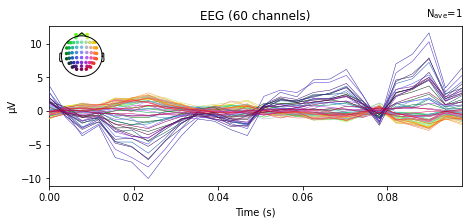

In [52]:
def custom_prep_source(data):
    
    # 将数据类型转换为 np.float32
    data = data.astype(np.float32)
    
    for i, y_sample in enumerate(data):
        max_abs_vals=np.array(np.max(abs(data[i])))
        max_abs_vals[max_abs_vals == 0] = 1
        data[i] /= max_abs_vals   

    print("The shape of source is", data.shape)
    
    return data

epochs=sim_test.eeg_data[40]
print(epochs)
evoked = epochs.average()
print(evoked)

# 可视化真实源
stc0 = sim_test.source_data[40]
stc0.plot(**plot_params)#通过stc.plot将模拟的真实脑源活动可视化
evoked.plot()

In [53]:
# 对源信号进行归一化
def custom_prep_source(data):
    
    # 将数据类型转换为 np.float32
    data = data.astype(np.float32)
    
    for i, y_sample in enumerate(data):
        max_abs_vals=np.array(np.max(abs(data[i])))
        max_abs_vals[max_abs_vals == 0] = 1
        data[i] /= max_abs_vals   

    print("The shape of source is", data.shape)
    
    return data

y_true = np.load('D:/jupyter_note/SWX_source/Simulated_data/y_test1.npy')
y_true = custom_prep_source(y_true)
stc0.data = y_true[45] # 1源用45画图


The shape of source is (1000, 1284, 26)


Forward model has free source orientation. This is currently not possible, converting to fixed.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


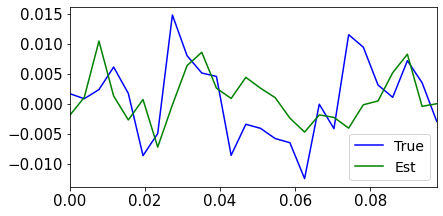

In [54]:
# Create a Solver instance
solver_name = "WMNE"
solver = Solver(solver_name)
alpha = 0.1

# Calculate the inverse operator
solver.make_inverse_operator(fwd)

# Apply the inverse operator to your data
stc = solver.apply_inverse_operator(evoked)

# Plot the resulting source estimate
stc.plot(**plot_params)

# 对结果进行归一化，方便对比

# plt.figure()
# plt.axes([0.1, 0.275, 0.85, 0.625])
# hl = plt.plot(stc.times, stc0.data.mean(0), "b")[0]
# plt.xlabel("Time (s)")
# plt.ylabel("Source amplitude (WMNE)")
# plt.xlim(stc.times[0], stc.times[-1])

# plt.figure()
# plt.axes([0.1, 0.275, 0.85, 0.625])
# hr = plt.plot(stc.times, stc.data.mean(0), "g")[0]
# plt.xlabel("Time (s)")
# plt.ylabel("Source amplitude (WMNE)")
# plt.xlim(stc.times[0], stc.times[-1])
est = stc.data.mean(0)
est1 = est*1000000

plt.figure()
plt.axes([0.1, 0.275, 0.85, 0.625])
hl = plt.plot(stc.times, stc0.data.mean(0), "b", label="True")[0]
hr = plt.plot(stc.times, est1, "g", label="Est")[0]
#plt.xlabel("Time (s)")
#plt.ylabel("Source amplitude")
plt.xlim(stc.times[0], stc.times[-1])
plt.tick_params(axis='x', labelsize=15)  # 设置x轴刻度标签的大小为14
plt.tick_params(axis='y', labelsize=15)  # 设置y轴刻度标签的大小为14
plt.legend(fontsize=14)  # 显示图例
#plt.savefig('WMNE.tif', dpi=300)  # 保存为 PNG 格式

Forward model has free source orientation. This is currently not possible, converting to fixed.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


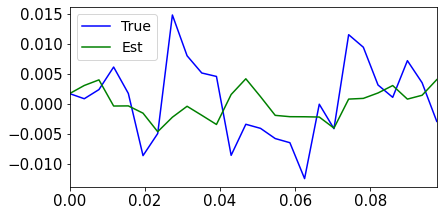

In [55]:
solver_name = "dSPM"
solver = Solver(solver_name)

# Calculate the inverse operator
solver.make_inverse_operator(fwd)

# Apply the inverse operator to your data
stc = solver.apply_inverse_operator(evoked)

# Plot the resulting source estimate
stc.plot(**plot_params)

est = stc.data.mean(0)
est1 = est*200000

plt.figure()
plt.axes([0.1, 0.275, 0.85, 0.625])
hl = plt.plot(stc.times, stc0.data.mean(0), "b", label="True")[0]
hr = plt.plot(stc.times, est1, "g", label="Est")[0]
#plt.xlabel("Time (s)")
#plt.ylabel("Source amplitude")
plt.xlim(stc.times[0], stc.times[-1])
plt.tick_params(axis='x', labelsize=15)  # 设置x轴刻度标签的大小为14
plt.tick_params(axis='y', labelsize=15)  # 设置y轴刻度标签的大小为14
plt.legend(fontsize=14)  # 显示图例
#plt.savefig('dSPM.tif', dpi=300)  # 保存为 PNG 格式

Forward model has free source orientation. This is currently not possible, converting to fixed.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


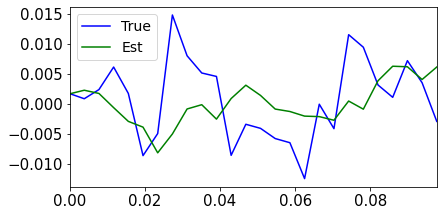

In [56]:
solver_name = "sloreta"
solver = Solver(solver_name)

# Calculate the inverse operator
solver.make_inverse_operator(fwd)

# Apply the inverse operator to your data
stc = solver.apply_inverse_operator(evoked)

# Plot the resulting source estimate
stc.plot(**plot_params)

est = stc.data.mean(0)
est1 = est*400000

plt.figure()
plt.axes([0.1, 0.275, 0.85, 0.625])
hl = plt.plot(stc.times, stc0.data.mean(0), "b", label="True")[0]
hr = plt.plot(stc.times, est1, "g", label="Est")[0]
#plt.xlabel("Time (s)")
#plt.ylabel("Source amplitude")
plt.xlim(stc.times[0], stc.times[-1])
plt.tick_params(axis='x', labelsize=15)  # 设置x轴刻度标签的大小为14
plt.tick_params(axis='y', labelsize=15)  # 设置y轴刻度标签的大小为14
plt.legend(fontsize=14)  # 显示图例
#plt.savefig('sloreta.tif', dpi=300)  # 保存为 PNG 格式

Forward model has free source orientation. This is currently not possible, converting to fixed.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


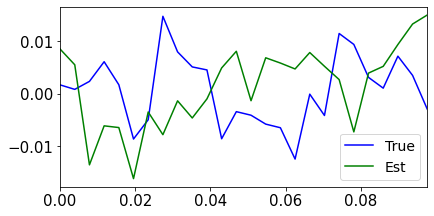

In [57]:
solver_name = "champagne"
solver = Solver(solver_name)

# Calculate the inverse operator
solver.make_inverse_operator(fwd,evoked,alpha)

# Apply the inverse operator to your data
stc = solver.apply_inverse_operator(evoked)

# Plot the resulting source estimate
stc.plot(**plot_params)

est = stc.data.mean(0)
est1 = est*400000

plt.figure()
plt.axes([0.1, 0.275, 0.85, 0.625])
hl = plt.plot(stc.times, stc0.data.mean(0), "b", label="True")[0]
hr = plt.plot(stc.times, est1, "g", label="Est")[0]
#plt.xlabel("Time (s)")
#plt.ylabel("Source amplitude")
plt.xlim(stc.times[0], stc.times[-1])
plt.tick_params(axis='x', labelsize=15)  # 设置x轴刻度标签的大小为14
plt.tick_params(axis='y', labelsize=15)  # 设置y轴刻度标签的大小为14
plt.legend(fontsize=14)  # 显示图例
#plt.savefig('champagne.tif', dpi=300)  # 保存为 PNG 格式

In [58]:
# 归一化
data1=stc0.data
data2=stc.data
data1=custom_prep_source(data1)
data2=custom_prep_source(data2)
stc0.data=data1
stc.data=data2

The shape of source is (1284, 26)
The shape of source is (1284, 26)
